In [1]:
# Importing dependencies
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# Reading and splitting data

In [94]:
'''
    Reading and dividing the data
'''
# Read CSV files
train_data = pd.read_csv("./OccupancyTrain.csv", header=None)
test_data = pd.read_csv("./OccupancyTest.csv", header=None)
# Investigating data
print(train_data.head())
print(test_data.head())

# Divide into train and test
x_train = train_data.iloc[:,:-1].values
y_train = train_data.iloc[:,-1].values
x_test = test_data.iloc[:,:-1].values
y_test = test_data.iloc[:,-1].values

# Combined data
df_combined = pd.concat([train_data, test_data])
print(df_combined.shape)
print(train_data.shape)
print(test_data.shape)
print(len(df_combined[df_combined.iloc[:,-1]==1.0]))
print(len(df_combined[df_combined.iloc[:,-1]==0.0]))

       0     1       2        3         4    5
0  21.29  21.1    0.00   592.50  0.003297  0.0
1  22.10  26.6  464.00  1073.25  0.004375  1.0
2  19.39  27.2    0.00   463.00  0.003783  0.0
3  20.60  19.5    0.00   435.00  0.002919  0.0
4  21.50  33.5  475.25  1281.50  0.005320  1.0
       0          1       2            3         4    5
0  23.10  29.700000  466.50  1224.666667  0.005198  1.0
1  19.79  36.200000   24.00   507.500000  0.005172  0.0
2  20.39  32.290000    0.00   684.000000  0.004785  0.0
3  21.50  32.090000  440.25   619.000000  0.005094  1.0
4  21.29  26.683333  454.00   895.166667  0.004176  1.0
(1000, 6)
(600, 6)
(400, 6)
500
500


# Exercise 1
## Visualization / 10 points

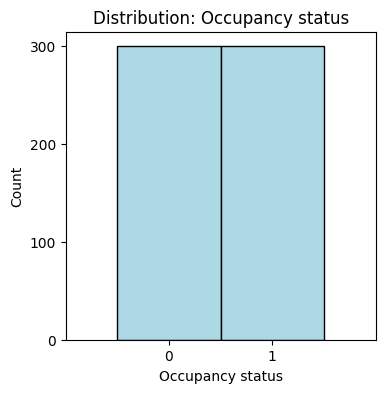

In [195]:
# Distribution
# Defining plot variables
df_combined_lc = train_data.iloc[:,-1] 
unique_values = df_combined_lc.unique()
bins = [unique_values[0] - .5, (unique_values[0] + unique_values[1]) / 2, unique_values[1] + .5]

# Defining plot
plt.figure(figsize=(4, 4))
plt.hist(df_combined_lc,bins=bins, ec="black", color="lightblue")

# Plot post-processing
plt.xlabel("Occupancy status")
plt.ylabel("Count")
plt.title("Distribution: Occupancy status")
plt.xticks(unique_values)
plt.yticks(np.arange(0, 600, step=100))
plt.margins(x=.25, y=.05)

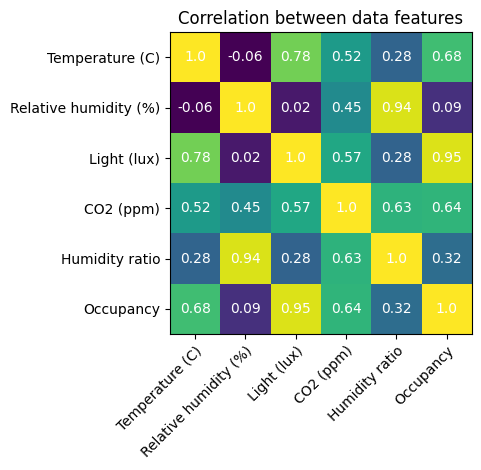

In [208]:
# Correlation
# Headers
headers = ["Temperature (C)", "Relative humidity (%)", "Light (lux)", "CO2 (ppm)", "Humidity ratio", "Occupancy"]

# Finding correlation
corr = df_combined.corr(method="pearson")

# Showing heatmap
fig, ax = plt.subplots()
im = ax.imshow(corr)

# Setting ticks
plt.xticks(ticks=np.arange(len(headers)), labels=headers)
plt.yticks(ticks=np.arange(len(headers)), labels=headers)

# Rotating ticks
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", 
         rotation_mode="anchor")

# Annotating plot
for i in range(len(headers)):
    for j in range(len(headers)):
        ax.text(j, i, round(corr.iloc[i, j], 2), ha="center", va="center", color="w")

# Customize the plot
ax.set_title("Correlation between data features")
fig.tight_layout()